<a href="https://colab.research.google.com/github/VedangSavadi/credit-card-default-risk-analysis/blob/main/decision_tree_credit_card_fraud_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV


In [ ]:
df = pd.read_csv("/content/train.csv")

In [ ]:
df.shape

(27000, 25)

In [ ]:
df.sample(5)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
20717,20717,290000,2,1,1,33,-2,-2,-2,-2,...,0,0,0,0,0,0,0,0,0,1
20063,20063,140000,2,2,1,28,-1,2,-1,-1,...,337,548,395,0,464,337,548,395,681,1
26599,26599,10000,1,2,1,50,0,0,0,0,...,8830,5550,6195,1300,3000,2509,0,6195,0,0
16621,16621,350000,2,2,1,29,-1,-1,-1,-1,...,4677,5767,6532,5932,9908,4692,5787,6548,4863,0
9910,9910,230000,2,2,1,38,-1,-1,-1,0,...,34372,32630,33334,0,24962,10000,943,1000,1058,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27000 entries, 0 to 26999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          27000 non-null  int64
 1   LIMIT_BAL                   27000 non-null  int64
 2   SEX                         27000 non-null  int64
 3   EDUCATION                   27000 non-null  int64
 4   MARRIAGE                    27000 non-null  int64
 5   AGE                         27000 non-null  int64
 6   PAY_0                       27000 non-null  int64
 7   PAY_2                       27000 non-null  int64
 8   PAY_3                       27000 non-null  int64
 9   PAY_4                       27000 non-null  int64
 10  PAY_5                       27000 non-null  int64
 11  PAY_6                       27000 non-null  int64
 12  BILL_AMT1                   27000 non-null  int64
 13  BILL_AMT2                   27000 non-null  int64
 14  BILL_A

In [ ]:
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,27000.00000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,...,27000.000000,27000.000000,27000.000000,27000.000000,2.700000e+04,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000
mean,13499.50000,167720.728889,1.603222,1.851667,1.552963,35.486778,-0.015593,-0.132407,-0.167593,-0.219407,...,43323.950148,40387.517852,38937.254593,5696.015889,5.986320e+03,5263.971296,4866.874519,4831.716741,5215.986519,0.221370
std,7794.37297,129930.809212,0.489238,0.791893,0.522478,9.213408,1.127431,1.197978,1.192726,1.166120,...,64555.808717,60975.562843,59684.515387,16840.646208,2.377914e+04,18001.091009,16021.590858,15499.162587,17681.861320,0.415177
min,0.00000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6749.75000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2384.500000,1780.000000,1270.750000,1000.000000,8.710000e+02,390.000000,298.000000,259.000000,130.000000,0.000000
50%,13499.50000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19078.500000,18135.000000,17135.000000,2100.000000,2.013000e+03,1800.000000,1500.000000,1500.000000,1500.000000,0.000000
75%,20249.25000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54345.500000,50149.000000,49205.250000,5012.000000,5.000000e+03,4532.250000,4010.000000,4051.000000,4000.000000,0.000000
max,26999.00000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.000000,621000.000000,426529.000000,527143.000000,1.000000


In [ ]:
df.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.corr()['default payment next month']

ID                            0.007422
LIMIT_BAL                    -0.155515
SEX                          -0.043300
EDUCATION                     0.029920
MARRIAGE                     -0.025451
AGE                           0.014645
PAY_0                         0.325468
PAY_2                         0.267445
PAY_3                         0.237455
PAY_4                         0.217221
PAY_5                         0.204350
PAY_6                         0.187644
BILL_AMT1                    -0.020364
BILL_AMT2                    -0.014537
BILL_AMT3                    -0.014958
BILL_AMT4                    -0.011267
BILL_AMT5                    -0.007740
BILL_AMT6                    -0.006268
PAY_AMT1                     -0.071034
PAY_AMT2                     -0.056725
PAY_AMT3                     -0.054711
PAY_AMT4                     -0.054609
PAY_AMT5                     -0.051910
PAY_AMT6                     -0.052233
default payment next month    1.000000
Name: default payment nex

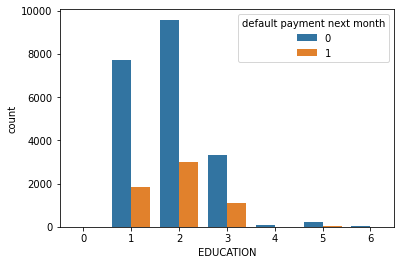

In [ ]:
sns.countplot(data=df,x='EDUCATION',hue='default payment next month')

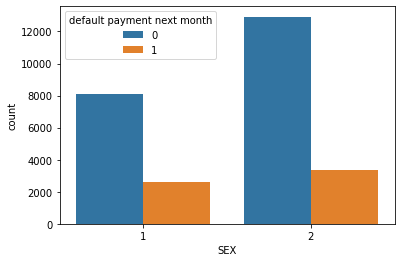

In [ ]:
sns.countplot(data=df,x='SEX',hue='default payment next month')

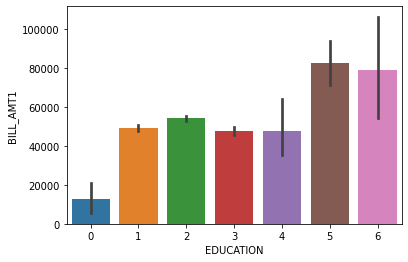

In [ ]:
sns.barplot(x='EDUCATION' , y = 'BILL_AMT1' , data=df)

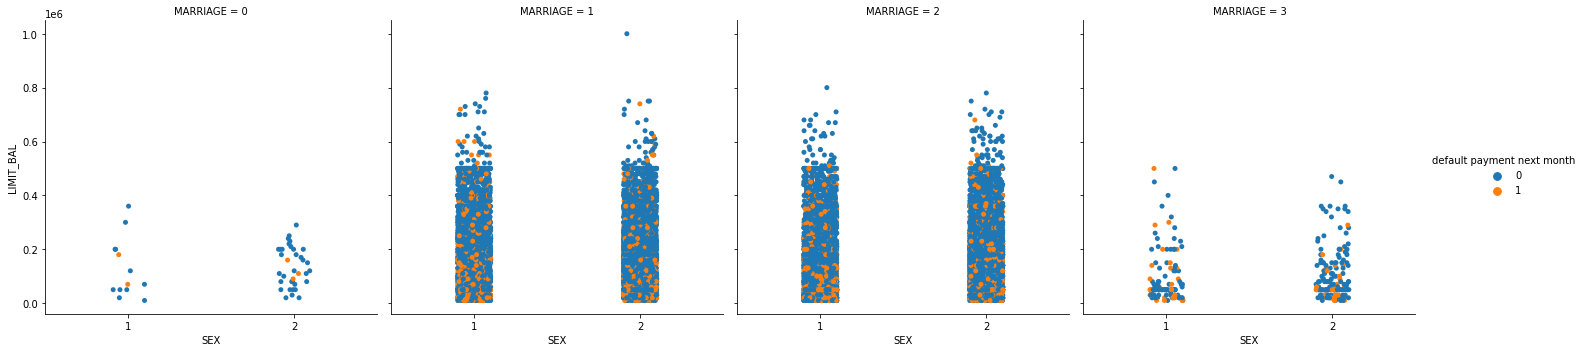

In [ ]:
sns.catplot(x="SEX", y="LIMIT_BAL", hue="default payment next month", col='MARRIAGE', data=df)

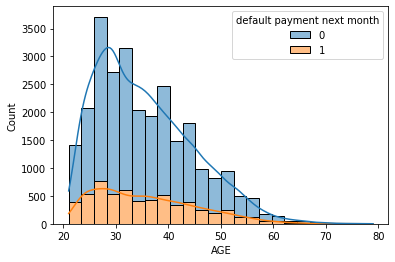

In [ ]:
sns.histplot(data=df, x = 'AGE' , hue = 'default payment next month', bins = 24 , multiple="stack" , kde=True)

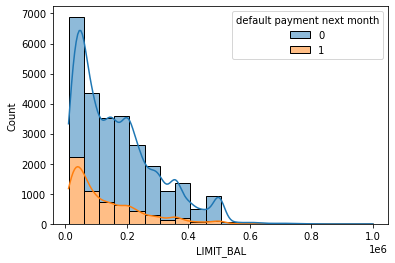

In [ ]:
sns.histplot(x = df['LIMIT_BAL'] , bins = 20, hue = df['default payment next month'] , multiple = 'stack',kde=True)

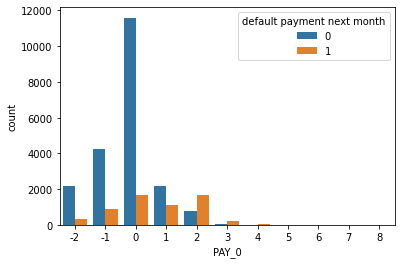

In [ ]:
sns.countplot(data=df , x = "PAY_0" , hue='default payment next month')

In [ ]:
df = df[['LIMIT_BAL', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6','default payment next month']]

In [ ]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]
X.shape , y.shape

((27000, 7), (27000,))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [ ]:
from sklearn.model_selection import GridSearchCV
params = {'max_depth': list(range(2, 10)), 
          'splitter' : ['best','random']
         }
grid_search_cv = GridSearchCV(DecisionTreeClassifier(random_state=42), params, verbose=1, cv=10,scoring='accuracy')
grid_search_cv.fit(X, y)

Fitting 10 folds for each of 16 candidates, totalling 160 fits


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7, 8, 9],
                         'splitter': ['best', 'random']},
             scoring='accuracy', verbose=1)

In [ ]:
print(grid_search_cv.best_params_)
print(grid_search_cv.best_score_)

{'max_depth': 4, 'splitter': 'best'}
0.8217777777777778


In [ ]:
dt = DecisionTreeClassifier(max_depth=4)
dt.fit(X_train,y_train)
y_pred = dt.predict(X_test)
accuracy_score(y_test,y_pred)

0.8219753086419753

In [ ]:
from sklearn.metrics import f1_score
print('f1_score',f1_score(y_test,y_pred))

f1_score 0.46907216494845366


In [ ]:
model = DecisionTreeClassifier(max_depth=4)

In [ ]:
model.fit(X,y)

DecisionTreeClassifier(max_depth=4)

In [ ]:
ndf=pd.read_csv('/content/test.csv')

In [ ]:
fdf=ndf[['LIMIT_BAL', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']]

In [ ]:
predicted_fraud=model.predict(fdf)

In [ ]:
predicted_fraud.shape

(3000,)

In [ ]:
final_df=pd.DataFrame(ndf['ID'],columns=['ID'])
final_df['default payment next month']=predicted_fraud

In [ ]:
final_df

,ID,default payment next month
0,27000,0
1,27001,0
2,27002,0
3,27003,0
4,27004,0
...,...,...
2995,29995,0
2996,29996,0
2997,29997,0
2998,29998,0


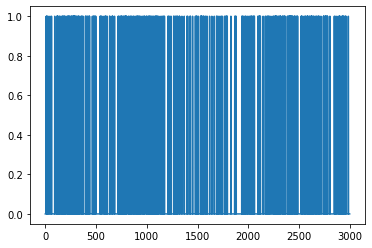

In [ ]:
plt.plot(predicted_fraud)

In [ ]:
final_df.to_csv('/content/fraud.csv')